In [3]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

# read data from a file
df = pd.read_csv('adm_data.csv')
# show first 5 rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Normal distribution for TOEFL score:**

In [4]:
# rename colums
df = df.rename(columns={"Serial No." : "SerialNo", "GRE Score": "GREscore", "TOEFL Score" : "TOEFLscore", "University Rating" : "UniversityRating", "Chance of Admit " : "ChanceOfAdmit", "LOR " : "LOR"})
# show column names
df.columns

Index(['SerialNo', 'GREscore', 'TOEFLscore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceOfAdmit'],
      dtype='object')

In [5]:
# 1. Calculate the mean and median for TOEFL scores.
mean = df['TOEFLscore'].mean()
median = df['TOEFLscore'].median()
print(f'Mean of TOEFL Score = {mean:.2f} \nMedian of TOEFL Score = {median:.2f}')

Mean of TOEFL Score = 107.41 
Median of TOEFL Score = 107.00


In [6]:
# 2. Calculate the standard deviation for TOEFL scores.
std = df['TOEFLscore'].std()
print(f'Standard deviation of TOEFL Score = {std}')

Standard deviation of TOEFL Score = 6.069513777374126


[Text(0.5, 1.0, 'TOEFL score histogram'), Text(0.5, 0, 'TOEFL score')]

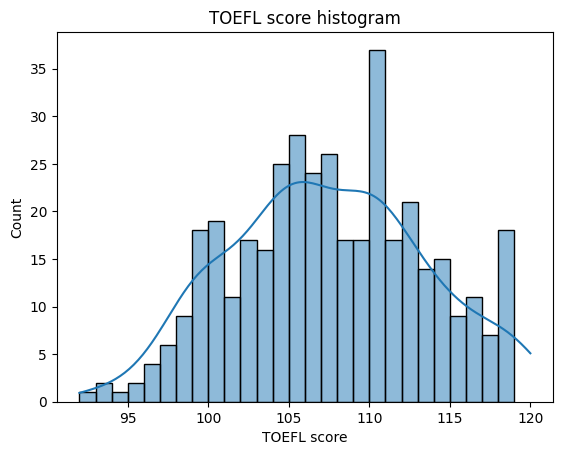

In [7]:
# 3. Create a histogram for the TOEFL score 
# and be sure to display the estimated Probability distribution curve.
min = df['TOEFLscore'].min()
max = df['TOEFLscore'].max()

# alternatively displot can be used
TOEFLhist = sns.histplot(data=df, x='TOEFLscore', bins=range(min, max, 1), kde=True) 
TOEFLhist.set(title='TOEFL score histogram', xlabel='TOEFL score')


In [31]:
# 4. Test whether the TOEFL score is selected from the normal distribution 
# using a statistical test. Consider the level.

# H0 = Data are normally distributed.
# Ha = Data are not normally distributed.

# Significance level:
nt_significance_lvl = 0.05

# D'Agostino-Pierson test for normal distribution
_, pvalue = stats.normaltest(df['TOEFLscore'])

if pvalue > nt_significance_lvl:
  print(f'P-value = {pvalue} which is > {nt_significance_lvl}. \nSupporting H0. Data are normally distributed.')
else:
  print(f'P-value = {pvalue} which is <= {nt_significance_lvl}. \nRejecting H0, supporting Ha. Data are not normally distributed.')

P-value = 0.005133021900485146 which is <= 0.05. 
Rejecting H0, supporting Ha. Data are not normally distributed.


In [32]:
# Shapiro-Wilk test for normal distribution

# Significance level:
sw_significance_lvl = 0.05

_, pvalue = stats.shapiro(df['TOEFLscore'])

if pvalue > sw_significance_lvl:
  print(f'P-value = {pvalue} which is > {sw_significance_lvl}. \nSupporting H0. Data are normally distributed.')
else:
  print(f'P-value = {pvalue} which is <= {sw_significance_lvl}. \nRejecting H0, supporting Ha. Data are not normally distributed.')

P-value = 0.001874727649925829 which is <= 0.05. 
Rejecting H0, supporting Ha. Data are not normally distributed.


**Hypothesis testing**

In [10]:
# 1. Divide the data into students with and without research experience.
Experienced = df[df['Research'] == 1]
InExperienced = df[df['Research'] == 0]

df['Research'].value_counts()


Research
1    219
0    181
Name: count, dtype: int64

In [11]:
# 2. For both groups, use the average GRE score.

print(f'Experienced students with Research: average GRE score = {Experienced['GREscore'].mean()}')
print(f'Inexperienced tudents with Research: average GRE score = {InExperienced['GREscore'].mean()}')


Experienced students with Research: average GRE score = 322.85388127853884
Inexperienced tudents with Research: average GRE score = 309.49171270718233


In [34]:
# 3. Statistically test whether there is a statistically significant difference 
# in GRE scores between the two groups of students. 
# Choose the correct test and remember to comment on the test scores.

# Prerequisities:
# D'Agostino-Pierson test for normal distribution
# H0 = Data are normally distributed.
# Ha = Data are not normally distributed.

# First group:
nt_significance_lvl = 0.05
_, pvalue = stats.normaltest(Experienced['GREscore'])

if pvalue > nt_significance_lvl:
  print(f'P-value = {pvalue} which is > {nt_significance_lvl}. \nSupporting H0. Data are normally distributed.')
else:
  print(f'P-value = {pvalue} which is <= {nt_significance_lvl}. \nRejecting H0, supporting Ha. Data are not normally distributed.')

P-value = 0.005145412486026274 which is <= 0.05. 
Rejecting H0, supporting Ha. Data are not normally distributed.


In [33]:
# Second group:
_, pvalue = stats.normaltest(InExperienced['GREscore'])

if pvalue > nt_significance_lvl:
  print(f'P-value = {pvalue} which is > {nt_significance_lvl}. \nSupporting H0. Data are normally distributed.')
else:
  print(f'P-value = {pvalue} which is <= {nt_significance_lvl}. \nRejecting H0, supporting Ha. Data are not normally distributed.')

P-value = 0.6076717821415273 which is > 0.05. 
Supporting H0. Data are normally distributed.


One of the group is not normaly distributed, therefore non-parametric test is needed.

In [36]:
# non-normal distribution + two independent samples + testing the average = Mann Whitney U test
# H0 = Experienced students have the same size of GRE score on average as Inexperienced students.
# Ha = Experienced students have a bigger size of GRE score on average than Inexperienced students.

_, pvalue = stats.mannwhitneyu(Experienced['GREscore'], InExperienced['GREscore'], alternative='greater')
nonsc_pvalue = np.format_float_positional(pvalue)

mwu_significance_lvl = 0.05

if pvalue > mwu_significance_lvl:
  print(f'P-value = {nonsc_pvalue} which is > {mwu_significance_lvl}. \nSupporting H0. \nExperienced students have the same size of GRE score on average as Inexperienced students.')
else:
  print(f'P-value = {nonsc_pvalue} which is <= {mwu_significance_lvl}. \nRejecting H0, supporting Ha. \nExperienced students have a bigger size of GRE score on average than Inexperienced students.')

P-value = 0.000000000000000000000000000000005716693210824049 which is <= 0.05. 
Rejecting H0, supporting Ha. 
Experienced students have a bigger size of GRE score on average than Inexperienced students.


**Correlation**

In [15]:
# 1. Calculate the correlation between TOEFL scores and GRE scores.
# 2. Comment on what the calculated correlation means. 
# Is this correlation high, positive/negative?

# Prerequisities:
# D'Agostino-Pierson test for normal distribution
# H0 = Data are normally distributed.
# Ha = Data are not normally distributed.

# First Group GRE Score:
nt_significance_lvl = 0.05
_, pvalue = stats.normaltest(df['GREscore'])

if pvalue > nt_significance_lvl:
  print(f'P-value = {pvalue} which is > {nt_significance_lvl}. \nSupporting H0. Data are normally distributed.')
else:
  print(f'P-value = {pvalue} which is <= {nt_significance_lvl}. \nRejecting H0, supporting Ha. Data are not normally distributed.')

P-value = 4.714531292500165e-05 which is <= 0.05. Rejecting H0, supporting Ha. Data are not normally distributed.


In [16]:
# Second Group TOEFL Score:
nt_significance_lvl = 0.05

_, pvalue = stats.normaltest(df['TOEFLscore'])

if pvalue > nt_significance_lvl:
  print(f'P-value = {pvalue} which is > {nt_significance_lvl}. \nSupporting H0. Data are normally distributed.')
else:
  print(f'P-value = {pvalue} which is <= {nt_significance_lvl}. \nRejecting H0, supporting Ha. Data are not normally distributed.')

P-value = 0.003945790155853822 which is <= 0.05. Rejecting H0, supporting Ha. Data are not normally distributed.


<Axes: xlabel='TOEFLscore', ylabel='GREscore'>

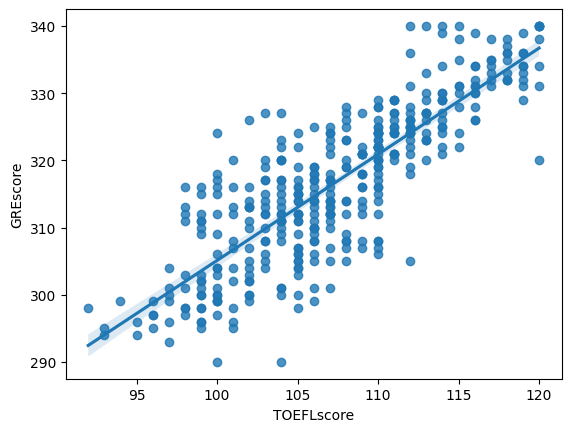

In [17]:
# Checking and showing the level of linearity and distant observations
sns.regplot(data=df, x='TOEFLscore', y='GREscore')

In [37]:
# Correlation coefficient and testing
# two samples, non-normal distribution, correlation testing = Kendall Tau or Spearman coefficient test

# H0 = GRE score and TOEFL score are not statistically dependent.
# Ha = GRE score and TOEFL score are statistically dependent.

statistic, pvalue = stats.kendalltau(df['TOEFLscore'], df['GREscore'])
nonsc_pvalue = np.format_float_positional(pvalue)

print(f'The level of correlation "Statistic" is: {statistic}. \nI.e. it is a strong positive correlation.\nThe higher GRE score, the higher TOEFL score.')

kt_significance_lvl = 0.05

if pvalue > kt_significance_lvl:
  print(f'P-value = {nonsc_pvalue} which is > {kt_significance_lvl}. \nSupporting H0.GRE score and TOEFL score are not statistically dependent.')
else:
  print(f'P-value = {nonsc_pvalue} which is <= {kt_significance_lvl}. \nRejecting H0, supporting Ha. GRE score and TOEFL score are statistically dependent.')


The level of correlation "Statistic" is: 0.6506790235591675. 
I.e. it is a strong positive correlation.
The higher GRE score, the higher TOEFL score.
P-value = 0.0000000000000000000000000000000000000000000000000000008840088930113862 which is <= 0.05. 
Rejecting H0, supporting Ha. GRE score and TOEFL score are statistically dependent.


[Text(0.5, 1.0, 'Chance of Admit and CGPA correlation'),
 Text(0, 0.5, 'Chance Of Admit')]

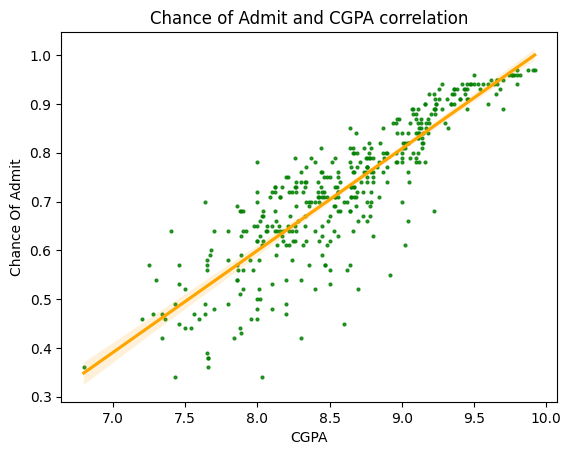

In [19]:
# 3. Create a correlation plot (sns.regplot) for the explained variance Chance of Admit 
# and the variable that is most highly correlated with it. 

correlation = df.corr()

max_corr_column = correlation['ChanceOfAdmit'].drop('ChanceOfAdmit').idxmax()
corplot = sns.regplot(data=df, y='ChanceOfAdmit', x=max_corr_column, scatter_kws={"s":4, "color": "green"}, line_kws={"color": "orange"})
corplot.set(title=f'Chance of Admit and {max_corr_column} correlation', ylabel='Chance Of Admit')


**Explanatory variable**

<Axes: xlabel='ChanceOfAdmit'>

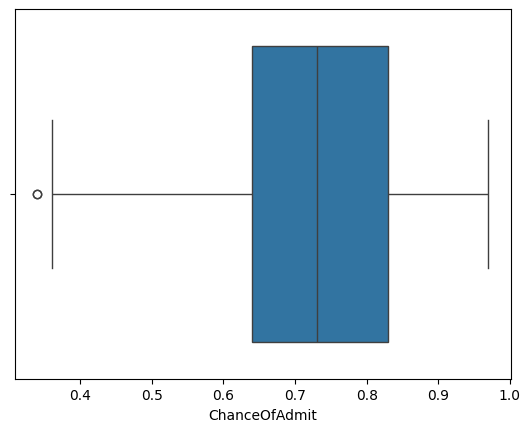

In [20]:
# 1. The Chance of Admit will be the next variable to be explained. 
# Create a boxplot for this graduate so that it is possible 
# to visually identify the outlying values, if any.

sns.boxplot(data=df, x='ChanceOfAdmit')

In [21]:
# identifying outliers
lowerWhisker = np.quantile(df['ChanceOfAdmit'], 0.25)
lowerWhisker

0.64

<Axes: xlabel='ChanceOfAdmit'>

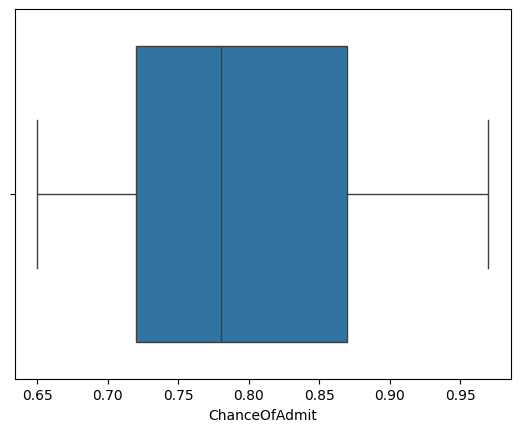

In [22]:
# 2. Eliminate outlying observations based on the criteria found in the boxplot.

df = df[df['ChanceOfAdmit'] > lowerWhisker]

sns.boxplot(data=df, x='ChanceOfAdmit')

**Linear regression**

In [23]:
# 1. Write an equation for linear regression. Include all variables in the equation, 
# that make sense. Note that you may need to rename the column names.
# 2. Estimate the parameters of the linear regression model.

formula = "ChanceOfAdmit ~ GREscore + TOEFLscore + UniversityRating + SOP + LOR + CGPA + Research"
mod = smf.ols(formula=formula, data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     201.0
Date:                Sun, 05 May 2024   Prob (F-statistic):          4.71e-105
Time:                        11:58:12   Log-Likelihood:                 538.01
No. Observations:                 287   AIC:                            -1060.
Df Residuals:                     279   BIC:                            -1031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7564      0.099     -7.676      0.000      -0.950      -0.562
GREscore             0.0010      0.000      2.077      0.039    5.05e-05       0.002
TOEFLscore           0.0036      0.001      4.704      0.000       0.002       0.005
UniversityRating     0.0106      0.004      3.002      0.003       0.004       0.018
SOP                  0.0034      0.004      0.748      0.455      -0.005       0.012
LOR                  0.0073      0.004      1.918      0.056      -0.000       0.015
CGPA                 0.0859      0.009      9.237      0.000       0.068       0.104
Research             0.0200      0.006      3.497      0.001       0.009       0.031
==============================================================================
Omnibus:                       37.119   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.074
Skew:                          -0.789   Prob(JB):                     4.04e-13
Kurtosis:                       4.511   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# 3. Interpret the coefficients of the model. 
# Which coefficients are statistically significant? 
# Discuss which variables have the largest effect on the chances of adoption and why.

# Statistically significant are those coefficients with p>|t| < 0.05 as a level of significanse. 
# The non-significant variables are "SOP" and "LOR", they should be removed.
# The largest effect on Adoption chances has Intercept (negative), CGPA (positive), 
# Research (positive), because its coefficients have the largest absolute values.


# 4. Evaluate the fit quality of your linear regression model 
# using the coefficient of determination R2.

# Value of 0,835 is high, The Regression model explains 83,5 % of 
# the variability Chance of Admit variable.

**Bonus: Cook's Distance**

In [25]:
# 1. Calculate Cook's distance for each point.

formula = "ChanceOfAdmit ~ GREscore + TOEFLscore + UniversityRating + CGPA + Research"
mod = smf.ols(formula=formula, data=df)
res = mod.fit()
influence = OLSInfluence(res)
df['CooksDistance'] = influence.cooks_distance[0]
df.head()

,SerialNo,GREscore,TOEFLscore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit,CooksDistance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000130
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.002921
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002505
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.000336
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.001103


<Axes: xlabel='CooksDistance', ylabel='Count'>

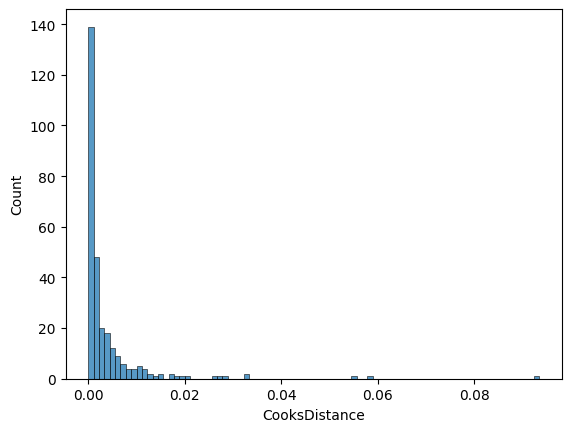

In [26]:
# 2. Create a histogram for Cook's distance. 
# Should be some points removed, because they would affect our linear regression too much?

sns.histplot(data=df, x='CooksDistance')

In [27]:
# removing outliers
df = df[df['CooksDistance'] < 0.025]

<Axes: xlabel='CooksDistance', ylabel='Count'>

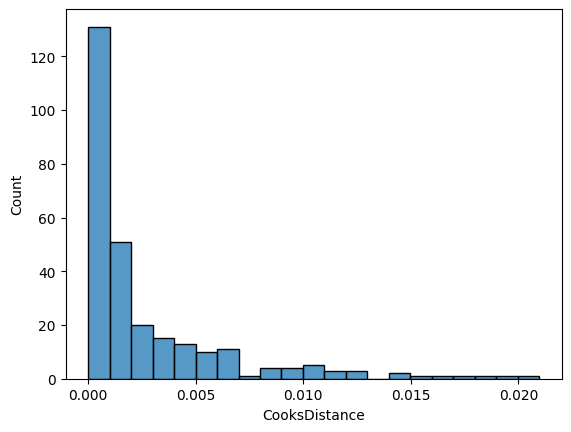

In [28]:
sns.histplot(data=df, x='CooksDistance')

In [29]:
formula = "ChanceOfAdmit ~ GREscore + TOEFLscore + UniversityRating + CGPA + Research"
mod = smf.ols(formula=formula, data=df)
res = mod.fit()
res.summary()

# After removing rows with Cooks distance > 0.025 is R-squared higher, 
# but the non-significance of GRE Score is also higher. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     351.9
Date:                Sun, 05 May 2024   Prob (F-statistic):          9.62e-117
Time:                        11:58:13   Log-Likelihood:                 552.93
No. Observations:                 279   AIC:                            -1094.
Df Residuals:                     273   BIC:                            -1072.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6053      0.091     -6.669      0.000      -0.784      -0.427
GREscore             0.0002      0.000      0.469      0.639      -0.001       0.001
TOEFLscore           0.0033      0.001      4.790      0.000       0.002       0.005
UniversityRating     0.0168      0.003      6.083      0.000       0.011       0.022
CGPA                 0.1018      0.008     12.366      0.000       0.086       0.118
Research             0.0262      0.005      5.022      0.000       0.016       0.037
==============================================================================
Omnibus:                       17.155   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.509
Skew:                          -0.598   Prob(JB):                     9.57e-05
Kurtosis:                       3.404   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# without GRE score
# After Removing GRE Score is Adj. R-sqared a little bit higher.
formula = "ChanceOfAdmit ~ TOEFLscore + UniversityRating + CGPA + Research"
mod = smf.ols(formula=formula, data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     441.1
Date:                Sun, 05 May 2024   Prob (F-statistic):          4.80e-118
Time:                        11:58:13   Log-Likelihood:                 552.82
No. Observations:                 279   AIC:                            -1096.
Df Residuals:                     274   BIC:                            -1077.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5713      0.054    -10.507      0.000      -0.678      -0.464
TOEFLscore           0.0034      0.001      5.526      0.000       0.002       0.005
UniversityRating     0.0168      0.003      6.116      0.000       0.011       0.022
CGPA                 0.1035      0.007     13.884      0.000       0.089       0.118
Research             0.0271      0.005      5.545      0.000       0.017       0.037
==============================================================================
Omnibus:                       17.484   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.919
Skew:                          -0.605   Prob(JB):                     7.79e-05
Kurtosis:                       3.404   Cond. No.                     2.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""